# Coherent States
B. McDonough \
J. Cui \
G. Marous

### Contents
1. Number-basis representation
2. Wigner function
3. Coherent states as Poissonian distributions over the number of quanta
4. Overlap of two coherent states
5. Classical correspondence
    1. Minimum-uncertainty states
    2. Time evolution

## What is a coherent state?
A coherent state $|\lambda\rangle$ is defined as an eigenstate of the annihilation operator $a$ with eigenvalue $\lambda$. It seems like it would be a contradiction that after removing a quantum from a state we could get the same state back. The resolution to this apparent contradiction lies in the infinite number of states in the state space of the qumode. Setting up the eigenvalue equation for some arbitrary state $|\psi\rangle$,
$$
a|\psi\rangle = \lambda|\psi\rangle \Rightarrow  \sum_{n=0}^\infty c_n a|n\rangle = \sum_{n=0}^{\infty}c_n \sqrt{n}|n-1\rangle = \sum_{n=0}^\infty\lambda c_n|n\rangle
$$
Equating the coefficients on the $n = m$ state, we find that $c_{m} = \frac{\lambda}{\sqrt{m}}c_{m-1}$. This means that $c_1 = \lambda c_0$, $c_2 = \frac{\lambda}{\sqrt{2}}c_1 = \frac{\lambda^2}{\sqrt{2}}c_0$, and so on, arriving at the general formula $c_m = \frac{\lambda^m}{\sqrt{m!}}c_0$. Now, we can find the value of $c_0$ by imposing that $|\psi\rangle$ is normalized:
$$
\langle \psi | \psi \rangle = |c_0|^2\sum_{mn} \frac{\lambda^n(\lambda^\ast)^m}{\sqrt{n!m!}}\langle m | n\rangle = c_0\sum_{n}\frac{(|\lambda|^2)^n}{n!} = |c_0|^2 e^{|\lambda|^2}
$$
Enforcing that this value must equal 1 gives $|c_0|^2 = e^{-|\lambda|^2}$. Plugging this in gives a general formula for a coherent state in the Fock basis:
$$
|\lambda\rangle = e^{-|\lambda|^2/2}\sum_{n=0}^{\infty}\frac{\lambda^n}{\sqrt{n!}}|n\rangle
$$

We see that the contradiction is resolved by a superposition of an infinite number of Fock states such that when a quantum is removed from one state, the next one up drops in to take its place, continuing ad infinitum.

In [6]:
import c2qa
from IPython.display import HTML
import qiskit
import qiskit.visualization
from matplotlib import pyplot as plt
import numpy as np

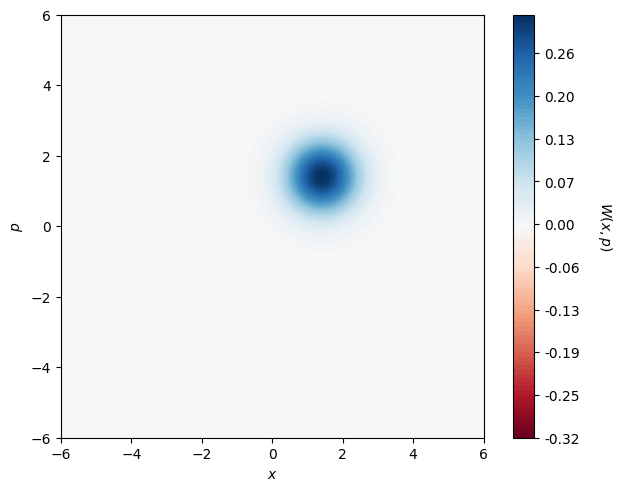

In [7]:
n = 4
qreg = c2qa.QumodeRegister(1, num_qubits_per_qumode=n)
creg = qiskit.ClassicalRegister(n)
circuit = c2qa.CVCircuit(qreg, creg, probe_measure=True)

#creating a coherent state with λ = (1+1i) using the displacement operator
Lambda = 1+1j
circuit.cv_d(Lambda, qreg[0])

state,_ = c2qa.util.simulate(circuit)
c2qa.wigner.plot_wigner(circuit, state)
#The coherent state is displaced along the x axis by sqrt(2)*Re(λ),
#and on the y axis by sqrt(2)*Im(λ)

## Fock number distribution
The coherent state is one of the few states we've discussed that do not have a definite number of quanta. The average number of quanta in a coherent state follows quickly from the eigenvalue equation:
$$
\bar n = \langle \lambda | \hat n | \lambda \rangle = \langle \lambda | a^\dagger a | \lambda \rangle = |\lambda|^2
$$
Evidently, coherent states with bigger magnitudes of $\lambda$ have on average more quanta. The average energy, setting the zero-point energy to be zero, is $\bar E = \hbar \omega \bar n = \hbar \omega |\lambda|^2$. If this is the mean number of quanta, then it is reasonable to ask what the distribution of the number of quanta would be if measured in the number basis. Using the Borne rule,
$$
p_\lambda(m) = |\langle m |\lambda \rangle|^2 = e^{-|\lambda|^2}\left|\sum_{n}^{\infty} \frac{\lambda^n\langle m | n\rangle}{\sqrt{n!}}\right|^2 = \frac{e^{-|\lambda|^2}(|\lambda|^2)^n}{n!}
$$
This is recognizable as a Poisson distribution with mean $|\lambda|^2$ and a standard deviation $|\lambda|$. One important consequence of this fact is that the ratio of the mean energy to the standard deviation of the energy is
$$
\frac{\Delta^\ast E}{\overline E} = |\lambda|^{-1}
$$
This implies that as $|\lambda|$ increases to macroscopic energies, the energy of the state has a tiny deviation relative to the mean, so it can be treated as approximately definite. This is useful for exploring the classical correspondence limit, which we will do in a second.

avg. no. quanta:  1.9942
|λ|^2 =  2.0000000000000004


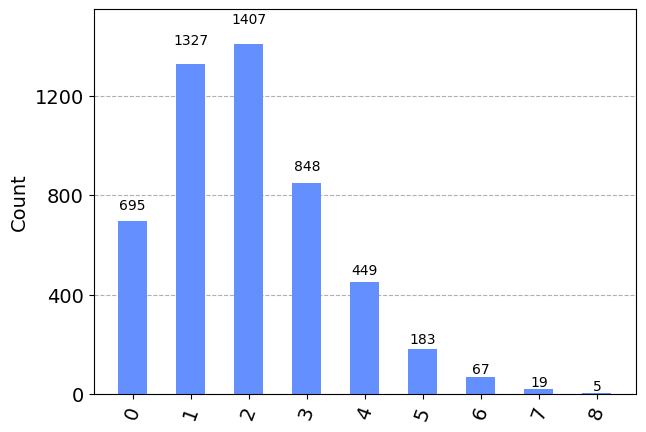

In [8]:
#Use the cv_measure method to map the Fock number onto creg!
circuit.cv_measure([qreg[0]], creg)

#Simulate
shots = 5000
_, result = c2qa.util.simulate(circuit, shots = shots)
counts = result.get_counts()

#The number of quanta counts obey a poisson distribution 
fock_counts = c2qa.util.cv_fockcounts(counts, [qreg[0]])
print("avg. no. quanta: ",np.sum([int(key)*val for (key,val) in fock_counts.items()])/shots)
print("|λ|^2 = ", np.abs(Lambda)**2)
qiskit.visualization.plot_histogram(fock_counts)

## Vanishing overlap
So far, we have only explored the orthonormal sets of eigenkets of $\hat x$ and $\hat n$. The orthonormality of these kets is implied by the fact that both $\hat x$ and $\hat n$ are Hermitian, i.e. $[\hat x, \hat x^\dagger] = 0$ and $[\hat n, \hat n^\dagger]=0$. However $[a,a^\dagger]=1$, so $a$ does not have an orthonormal eigenbasis. If two coherent states $|\theta\rangle$, $|\lambda\rangle$ are not orthogonal, then they have some non-trivial inner product. For simplicity, take $|\lambda\rangle$ and $|\theta\rangle$ to be two coherent states where both $\lambda$ and $\theta$ are real.
$$
\langle \theta | \lambda \rangle = e^{-(\theta)^2/2-(\lambda)^2/2}\sum_{m,n}\frac{(\theta)^m(\lambda)^n\langle m | n \rangle}{\sqrt{n!m!}}
= e^{-(\theta)^2/2-(\lambda)^2/2}\sum_{m,n}\frac{(\theta\lambda)^n}{n!}
= e^{-(\theta)^2/2+\lambda\theta -(\lambda)^2/2}
= e^{-(\theta-\lambda)^2/2}
$$
It can be shown that for a general (possibly imaginary) $\theta$ and $\lambda$, this expression becomes 
$$
\langle \theta | \lambda \rangle = e^{-|\lambda-\theta|^2/2}
$$
This gives a condition that as $\lambda$ and $\theta$ get farther apart in the complex plane, the overlap $\langle \theta | \lambda \rangle$ gets exponentially smaller. This fact becomes important when coherent states are used as approximate orthogonal states.

**Exercise:** Read `gates.ipynb` and modify this proof for a general $\lambda, \theta \in \mathbb{C}$. Use the fact that the *displacement* and *phase space rotation* gates are unitary, and therefore preserve inner products.

### Measuring the overlap
Using the `simulate` function, we can simulate the creation of two coherent states and take their overlap:

/home/ben/miniconda3/envs/science/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


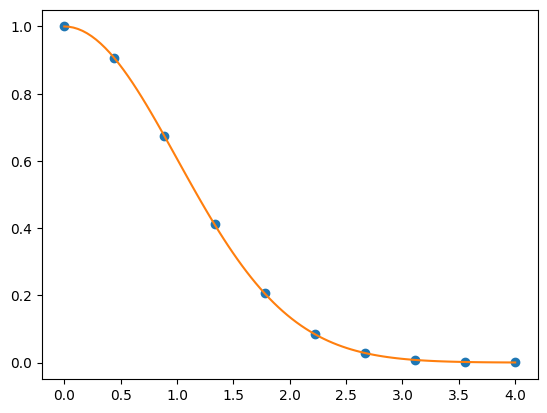

In [9]:
def measure_overlap(alpha1, alpha2):
    qreg = c2qa.QumodeRegister(1, num_qubits_per_qumode=5)
    circuit = c2qa.CVCircuit(qreg)

    circuit.cv_d(alpha1, qreg[0])
    state1, _ = c2qa.util.simulate(circuit)

    circuit.clear()

    circuit.cv_d(alpha2, qreg[0])
    state2, _ = c2qa.util.simulate(circuit)
    
    return state1.inner(state2)

ds = np.linspace(0,4,10)
overlaps = []
for d in ds:
    overlaps.append(measure_overlap(d/2, -d/2))

plt.plot(ds, overlaps, linestyle = "None", marker = "o")

xlist = np.linspace(0,4,100)
plt.plot(xlist, np.exp(-(xlist)**2/2))

## The Uncertainty Principle 
In quantum mechanics, two noncommuting observables cannot simultaneously have a definite value. This is a general property of operators which is expressed by the uncertainty principle. Let $|\delta\rangle$ be an arbitrary state, and let $A$ and $B$ be two operators. Then define $\Delta A = A - \langle A \rangle_\delta$ and $\Delta B = B - \langle B \rangle_\delta$. 

**Exercise** : The Cauchy-Schwarz inequality states that for any vectors $|a\rangle$ and $| b \rangle$, we have $\langle a | a \rangle \langle b | b\rangle \geq |\langle a | b \rangle|^2$. Prove this by considering $|\delta\rangle = |a\rangle-\frac{\langle b | a \rangle}{\langle b | b \rangle}| b\rangle$, and using the fact that $\langle \delta | \delta \rangle \geq 1$.

By application of the Cauchy-Schwarz inequality, we find
$$
\langle (\Delta A)^2 \rangle_\delta \langle (\Delta B)^2 \rangle_\delta \geq |\langle \Delta A \Delta B \rangle_\delta|^2 = \frac{1}{4}|\langle [\Delta A, \Delta B] + \{\Delta A, \Delta B\} \rangle_\delta|^2
$$
Where $\{\cdot, \cdot\}$ refers to the anti-commutator, defined $\{A, B\} = AB + BA$. Since $A$ and $B$ are observables, they are Hermitian, which means that $\Delta A$ and $\Delta B$ are Hermitian. 

**Exercise**: Prove that $\langle A \rangle$ is real if $A$ is Hermitian and imaginary if $A$ is anti-hermitian. Now prove that for two Hermitian operators $A$ and $B$, we have $[A, B]$ is anti-Hermitian and $\{A, B\}$ is Hermitian.

Using the result from the exercise above, we see that $|\langle[\Delta A, \Delta B]\rangle + \langle\{\Delta A, \Delta B\}\rangle|^2 = |\langle[\Delta A, \Delta B]\rangle|^2 + \langle\{\Delta A, \Delta B\}\rangle^2$, and so

$$
\frac{1}{4}|\langle [\Delta A, \Delta B] + \{\Delta A, \Delta B\} \rangle_\delta|^2 \geq \frac{1}{4}|\langle [\Delta A, \delta B]\rangle_\delta|^2 =  \frac{1}{4}|\langle [ A, B]\rangle_\delta|^2
$$
Putting these inequalities together gives the uncertainty principle:
$$
\langle (\Delta A)^2 \rangle_\delta \langle (\Delta B)^2 \rangle_\delta \geq \frac{1}{4}|\langle [A,B] \rangle_\delta|^2
$$

### Minimum uncertainty states
The ground state of the harmonic oscillator is a minimum-uncertainty state, in that it saturates the above inequality for the operators $\hat X$ and $\hat P$. Since coherent states are just translated ground states, it makes sense that all coherent states are minimum-uncertainty states. This is one way in which coherent states are the "most classical" states of a qumode.

Consider an arbitrary coherent state $|\lambda\rangle$. Then consider that 
$$
\hat X^2 = \frac{1}{4}(a^2+aa^\dagger + a^\dagger a +{a^{\dagger}}^2)
= \frac{1}{4}(a^2+ 2a^\dagger a+[a,a^\dagger] +{a^{\dagger}}^2)
= \frac{1}{4}(a^2+ 2\hat n+ 1 +{a^{\dagger}}^2)
$$
This gives
$$
\langle \lambda | \hat X^2 | \lambda \rangle  
= \frac{1}{2}(\langle \lambda |a^2|\lambda \rangle+ 2\langle \lambda |\hat n|\lambda \rangle+ 1 +\langle \lambda | {a^{\dagger}}^2| \lambda \rangle)
= \frac{1}{2}(\lambda^2+ 2|\lambda|^2+ 1 +{\lambda^\ast}^2)
$$
Then we also have
$$
\langle \lambda | \hat X |\lambda \rangle = \frac{1}{2}\langle \lambda |a+a^\dagger| \lambda \rangle = \frac{1}{\sqrt{2}}(\lambda + \lambda^\ast)
$$
Putting these together gives the variance, or dispersion, of $\hat X$ on the state $|\lambda \rangle$:
$$
\langle \hat X^2 \rangle - \langle \hat X \rangle^2 = \frac{1}{2}
$$
We can carry out a very similar derivation for $\hat P$ to show that 
$$
\langle \hat P^2 \rangle-\langle \hat P \rangle^2 = \frac{1}{2}
$$
as well. Since $[\hat X, \hat P] = i$, this shows that
$$
\langle (\Delta \hat X)^2\rangle \langle (\Delta \hat P)^2 \rangle = \frac{1}{4} = \frac{1}{4}|\langle [\hat X, \hat P]\rangle|^2
$$
which demonstrates that $|\lambda\rangle$ saturates the uncertainty principle.
Since $X$ and $P$ are only shifted by the displacement and not rescaled, the variances of $X$ and $P$ are left unchanged. This makes every coherent state $|\lambda\rangle$ a minimum uncertainty state with the symmetrical uncertainties $\langle (\Delta X) \rangle^2 = \langle (\Delta P)^2 \rangle = \frac{1}{2}$.  

## The correspondence limit
As discussed in `operations.ipynb`, the Hamiltonian, or energy operator for the qumode is proportional to the number operator:
$$
H = \omega \hat n
$$
Schrödinger's equation is a differential equation relating the evolution of the wavefunction in time to the Hamiltonian:
$$
i \frac{\partial}{\partial t}|\psi\rangle = H|\psi\rangle
$$
Since $H$ does not depend on time, this equation can be integrated directly to get
$$
|\psi, t\rangle = e^{-i \omega \hat n t}|\psi\rangle = r(-\omega t)|\psi\rangle
$$
Where we have written the resulting operator in terms of the phase space rotation operator. As shown above, applying the phase space rotation to a coherent state results in another coherent state:
$$
|\lambda, t\rangle = r(-\omega t)|\lambda\rangle = |e^{-i\omega t}\lambda \rangle
$$
As we have shown, $\langle X \rangle_0 = \langle P \rangle_0 = 0$. Using the displaced operators $X$ and $P$ from above, and defining $\phi \equiv \arg(\lambda)$, 
\begin{align*}
    \langle X \rangle_\lambda &= \sqrt{2}\operatorname{Re}(e^{-i\omega t}\lambda) = |\lambda|\sqrt{2}\cos(\omega t+\phi) & \langle P \rangle_\lambda = \sqrt{2}\operatorname{Im}(e^{-i\omega t}\lambda) = -|\lambda|\sqrt{2}\sin(\omega t+\phi)
\end{align*}
Moving into the rescaled coordinates that produce the Harmonic oscillator potential, we have
\begin{align*}
    \langle x \rangle_\lambda &= (m\omega)^{-\frac{1}{2}}\langle X \rangle_\lambda = \langle x(0)\rangle\cos(\omega t+\phi)\\
    \langle p \rangle_\lambda &= (m \omega)^{\frac{1}{2}}\langle P\rangle_\lambda = -m\omega \langle x(0)\rangle \sin(\omega t +\phi)
\end{align*}
Compare this to a classical harmonic oscillator, like the one depicted below:

![A classical harmonic oscillator](./figures/oscillator.svg )

Taking $k = m\omega^2$, Newton's 2nd Law says that $x''(t) = -m\omega x(t)$, and the solution to this equation is $x(t) = x(0)\cos(\omega t + \phi)$. Using $p=mx'$, we recover $p(t) = -m\omega x(0)\sin(\omega t + \phi)$. Evidently, the expectation value of the coherent state evolves under the same equations of motion as a classical harmonic oscillator.

### Simulation of Coherent state evolution
The *phase space rotation* operator can be used to simulate the time-evolution operator $e^{-i\omega\hat nt}$ of the Harmonic oscillator. We can then use the `animate_wigner` functionality to see what this evolution looks like at different time steps.

Compare the oscillatory motion of the coherent blob in Wigner space to the evolving configuration of a classical harmonic oscillator in phase space--they are the same!

c:\Users\Jeb Cui\Desktop\bosonic-qiskit-tutorials\new-venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


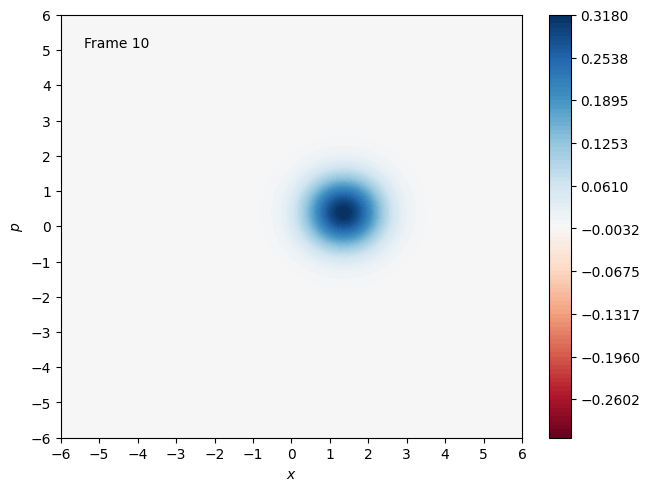

In [5]:
qr = qiskit.QuantumRegister(1)
qmr = c2qa.QumodeRegister(1, num_qubits_per_qumode=4)

circuit = c2qa.CVCircuit(qmr, qr)

animate_steps = 10
t0 = 0
tf = 1
osc_frequency = 6 #6 GHz oscillator

#prepare initial state
circuit.cv_d(1, qmr[0])

stepsize = (tf-t0)/animate_steps
for t in range(animate_steps):
    circuit.cv_r(-osc_frequency*(stepsize), qmr[0])

anim = c2qa.animate.animate_wigner(circuit, qubit=qr[0], animation_segments=1);
HTML(anim.to_html5_video())

## Citations
[1] Gerry, Christopher, Peter Knight, and Peter L. Knight. Introductory quantum optics. Cambridge university press, 2005.